In [ ]:
import pandas as pd

from da_libraries.manage_data_for_da import StrainDataManager

%matplotlib qt

In [2]:
help(StrainDataManager)

Help on class StrainDataManager in module kubota_libraries.manage_data_for_da:

class StrainDataManager(scripts.kubota_libraries.arrange_data.DataOrganizer)
 |  ひずみデータの個別参照、統計解析を行うクラス
 |  
 |  Method resolution order:
 |      StrainDataManager
 |      scripts.kubota_libraries.arrange_data.DataOrganizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      コンストラクタ
 |  
 |  change_data(self)
 |      同じフォルダー（風向・風速が同じデータ群）の中でデータを変更する関数
 |      Returns:
 |          None
 |  
 |  choose_data(self)
 |      フォルダー（風向・風速が同じデータ群）およびデータを選択する関数
 |      Returns:
 |          None
 |  
 |  compute_average(self, should_normalize: bool)
 |      各データフレームの平均値を計算し、それらを連結した新しいデータフレームを作成します。
 |      
 |      Returns:
 |          pd.DataFrame: 平均値を含む新しいデータフレーム
 |  
 |  compute_pca(self, n_components: int)
 |      PCAを実行
 |      
 |      Aggs:
 |          n_components: 何次元にするか
 |      
 |      Returns:
 |          pd.DataFrame: PCAをした新しい値
 |  
 |  display_assemble_average_plot(

In [3]:
strain_data_manager = StrainDataManager()

Whole or Split:  Split
Flatten or Raw:  Raw
data_split_by_1_periodを選択
NORMALIZED:  NO
['../data/230717_o1h&o2/2_split_data\\raw_data\\data_split_by_1_period\\not_normalized\\organized_data.pkl']


  0%|          | 0/1 [00:00<?, ?it/s]

After checking the graph of raw data (arranged_strain_dataframes), implement get_split_strain_data_dfs.


## 個別データの参照

In [12]:
strain_data_manager.choose_data()

Folder name: 20deg
# data: All


In [13]:
strain_data_manager.change_data()

# data: All


In [14]:
strain_data_manager.show_data()
# strain_data_manager.show_data().to_csv(r"C:\Users\tokyo\PycharmProjects\WindDitection\whole.csv")

,WE,SP,SG1,SG2,SG3,SG4,SG5,SG6,EN1
0,20deg,1,-87.037003,-58.443142,-74.911568,-183.531570,-69.571289,-16.105858,1.192692
1,20deg,1,-86.375572,-55.327427,-74.100143,-167.550140,-95.474144,-35.303001,1.192410
2,20deg,1,-62.179855,-39.153141,-50.907288,-156.491577,-87.781288,-54.180141,1.191586
3,20deg,1,-47.731285,-23.848858,-32.468716,-177.060150,-82.545570,-85.163002,1.191994
4,20deg,1,-3.101286,-29.687429,-23.397285,-153.575851,-85.832718,-96.501572,1.192597
...,...,...,...,...,...,...,...,...,...
199995,20deg,4,-764.574280,-494.437286,-158.020432,-137.465851,-53.470142,91.085571,0.128527
199996,20deg,4,-757.944275,-464.083008,-117.579002,-151.571579,-48.540142,98.602715,0.128700
199997,20deg,4,-765.917114,-450.580139,-111.121857,-122.377289,-58.875858,99.731285,0.128606
199998,20deg,4,-778.435730,-448.757294,-115.084717,-86.200142,-46.715858,107.342712,0.128614


## マクロ的な統計解析

In [4]:
data = strain_data_manager.compute_average(should_normalize=True)
data

,WE,SP,SG1,SG2,SG3,SG4,SG5,SG6,EN1
0,0deg,1,-0.599348,-0.790218,-0.536054,-0.208642,0.047897,-0.607092,-1.208634
1,0deg,2,-0.561758,-0.767004,-0.550251,-0.416212,-0.048471,0.154269,-0.607801
2,0deg,3,-0.653384,-0.934179,-0.437932,-0.359174,-0.010027,-0.010358,-0.813438
3,0deg,4,-0.507683,-0.760744,-0.286035,-0.211879,0.160546,-4.357914,-0.438592
4,0deg,5,-0.398598,-0.671239,-0.279848,-0.464392,-0.011645,-3.611170,-0.345393
...,...,...,...,...,...,...,...,...,...
5275,No Wind,476,-1.299400,-0.492785,-0.251238,1.660347,-0.034849,0.563002,-0.943447
5276,No Wind,477,-0.900065,-0.575323,-0.409553,1.583380,0.072576,0.557879,-0.940938
5277,No Wind,478,-0.650253,-0.413237,-0.397113,1.589537,0.210476,0.524261,-0.582832
5278,No Wind,479,-0.264947,0.177746,-0.076062,1.720807,0.082013,0.507032,-0.724079


In [5]:
data_column_names = ["SG1", "SG2", "SG3", "SG4", "SG5", "SG6", "EN1"]

figs = strain_data_manager.plot_combinations_2d(data, data_column_names)

5
6
7


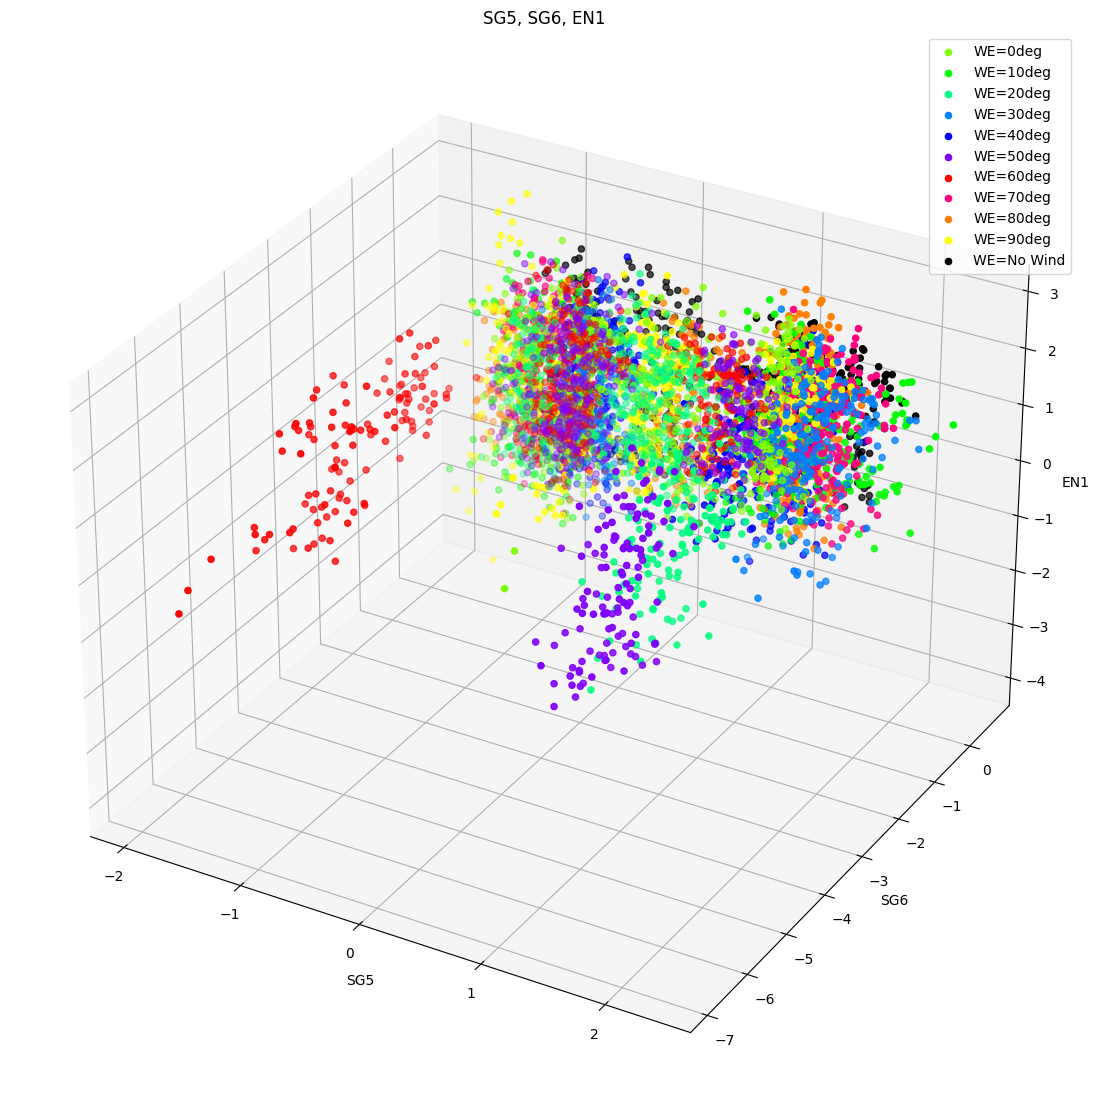

In [7]:
fig = strain_data_manager.plot_combinations_3d(data, data_column_names)
fig

In [6]:
data = strain_data_manager.compute_pca(n_components=2)
data

Eigenvalues: [3.5703971 1.3460296]
Explained Variance Ratio: [0.5099602  0.19225354]
Cumulative Explained Variance: [0.5099602 0.7022137]
Loadings in DataFrame:
           SG1       SG2       SG3       SG4       SG5       SG6       EN1
PC1 -0.503889 -0.467162 -0.467675 -0.013058 -0.422045  0.163832 -0.322493
PC2 -0.069570 -0.222286  0.173563 -0.719861  0.052934 -0.605155 -0.168551


,SP,WE,PC1,PC2
0,1,0deg,1.194689,0.848145
1,2,0deg,1.145896,0.420214
2,3,0deg,1.240010,0.578502
3,4,0deg,0.107463,3.026937
4,5,0deg,0.176044,2.705580
...,...,...,...,...
5275,476,No Wind,1.391982,-1.222415
5276,477,No Wind,1.257378,-1.195557
5277,478,No Wind,0.870687,-1.283955
5278,479,No Wind,0.345535,-1.453469


In [7]:
data_column_names = ["PC1", "PC2"]
figs = strain_data_manager.plot_combinations_2d(data, data_column_names, nrows=1, ncols=1)

In [8]:
data = strain_data_manager.compute_pca(n_components=3)
data

Eigenvalues: [3.5703971 1.3460292 0.8757369]
Explained Variance Ratio: [0.5099602  0.19225347 0.12508158]
Cumulative Explained Variance: [0.5099602  0.70221364 0.82729524]
Loadings in DataFrame:
           SG1       SG2       SG3       SG4       SG5       SG6       EN1
PC1 -0.503889 -0.467162 -0.467675 -0.013058 -0.422045  0.163832 -0.322493
PC2 -0.069570 -0.222286  0.173563 -0.719861  0.052935 -0.605156 -0.168551
PC3  0.142941  0.090080 -0.322711 -0.294130 -0.483557 -0.040179  0.738483


,SP,WE,PC1,PC2,PC3
0,1,0deg,1.194690,0.848146,-0.813820
1,2,0deg,1.145895,0.420215,-0.281010
2,3,0deg,1.240009,0.578500,-0.526026
3,4,0deg,0.107463,3.026940,-0.212897
4,5,0deg,0.176044,2.705583,0.005119
...,...,...,...,...,...
5275,476,No Wind,1.391981,-1.222416,-1.339898
5276,477,No Wind,1.257378,-1.195558,-1.266410
5277,478,No Wind,0.870687,-1.283956,-1.022804
5278,479,No Wind,0.345535,-1.453469,-1.098205


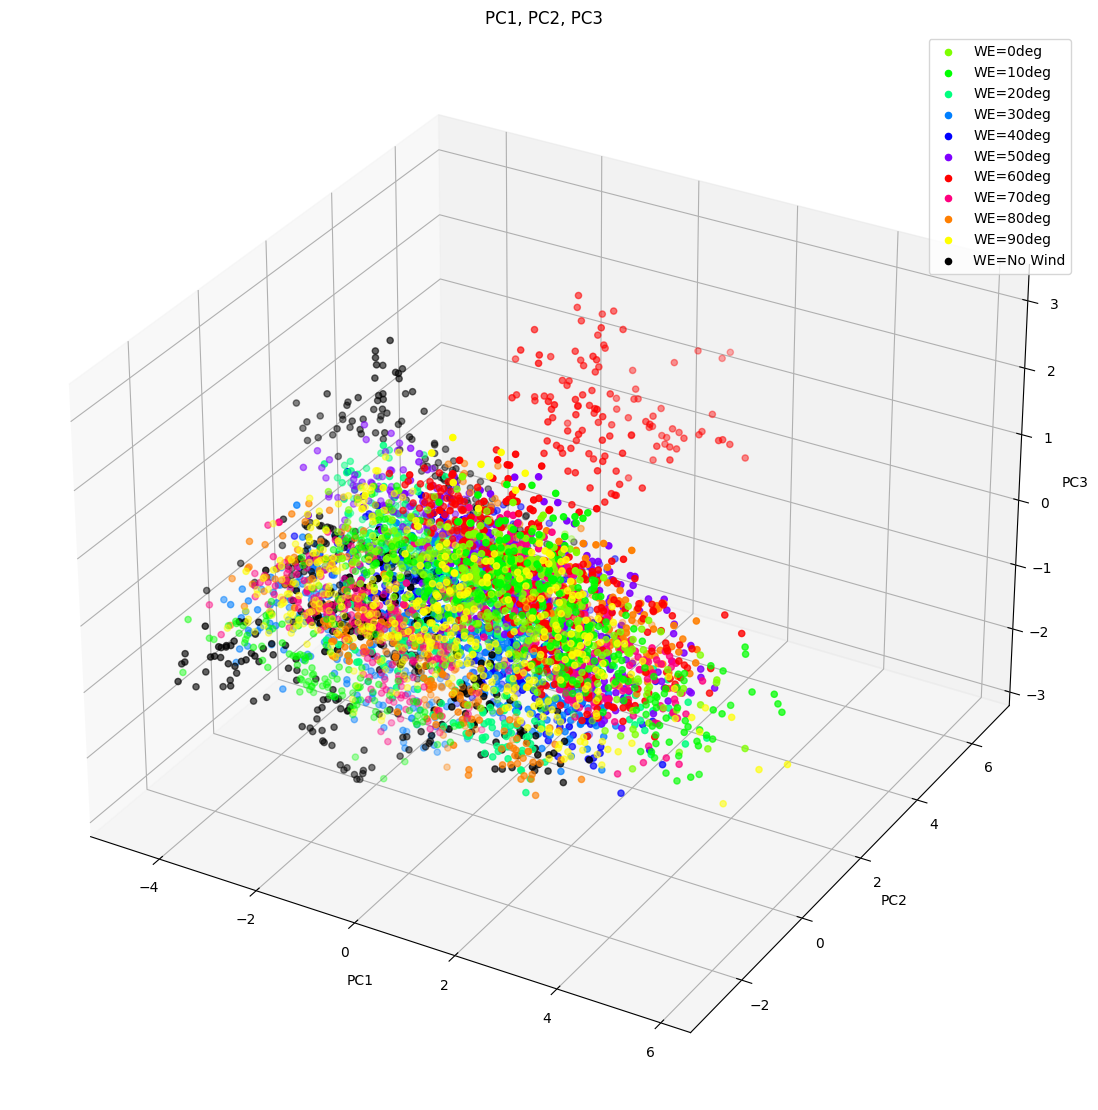

In [10]:
data_column_names = ["PC1", "PC2", "PC3"]
fig = strain_data_manager.plot_combinations_3d(data, data_column_names)
fig

In [11]:
fig.savefig(r"C:\Users\TanakaLaboratory\Downloads\pca.svg")